# LangChain and Google's Gemini

In [6]:
pip install -q langchain-google-genai

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade -q langchain-google-genai

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip show langchain-google-genai


Name: langchain-google-genai
Version: 0.0.11
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: /home/nishihara/.local/lib/python3.11/site-packages
Requires: google-generativeai, langchain-core
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -q google-generativeai

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [11]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [12]:
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')
    

In [13]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


## Integrating Gemini with LangChain

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)
response = llm.invoke('Write a paragraph about life in Mars in year 2100.')
print(response.content)

Life on Mars in 2100 is a blend of scientific marvels and challenges. The bustling Martian metropolis of Elysium City stands tall, its domed structures providing shelter from the harsh environment. Martian colonists have adapted to the planet's thin atmosphere and low gravity, creating a vibrant society. Hydroponic farms produce exotic plants under artificial sunlight, while automated drones maintain the intricate infrastructure. Despite the technological advancements, the harsh Martian conditions persist. Radiation shielding protects colonists from cosmic rays, and pressurized suits are necessary for venturing outside. The search for water remains paramount, with underground aquifers providing sustenance. Amidst the stark beauty of the Martian landscape, human ingenuity and perseverance have established a foothold on the Red Planet.


In [15]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('Your are a content creator. Write me a tweet about {topic}')
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'Why will AI change the world'
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Your are a content creator. Write me a tweet about Why will AI change the world

> Finished chain.
{'topic': 'Why will AI change the world', 'text': '🚨AI Revolution: Brace for a Transformative Impact🚨\n\nArtificial Intelligence (AI) is poised to revolutionize our world in profound ways:\n- Automating tasks, boosting efficiency\n- Enhancing decision-making, reducing errors\n- Creating new industries and job opportunities\n- Improving healthcare, education, and transportation\n- Empowering individuals with personalized experiences\n\n#AIRevolution #FutureTech'}


In [16]:
print(response['topic'])
print()
print(response['text'])

Why will AI change the world

🚨AI Revolution: Brace for a Transformative Impact🚨

Artificial Intelligence (AI) is poised to revolutionize our world in profound ways:
- Automating tasks, boosting efficiency
- Enhancing decision-making, reducing errors
- Creating new industries and job opportunities
- Improving healthcare, education, and transportation
- Empowering individuals with personalized experiences

#AIRevolution #FutureTech


## System Propmpt and Streaming

In [18]:
from langchain_core.messages import HumanMessage, SystemMessage
# SystemMessage -> establish tone, personality, instructions
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Answer only YES or NO in Franch.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)
output.content

'NON'

### Streaming

In [19]:
# temperature = 0 -> be exact
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature = 0)  
prompt = 'Write a scientific paper outlining the mathematical foundation of our universe.'
response = llm.invoke(prompt)
print(response.content)

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks to modern-day physicists, scientists have sought to unravel the mysteries of the cosmos through observation, experimentation, and mathematical modeling. Mathematics has emerged as an indispensable tool in this quest, providing a language for describing the universe's structure and dynamics.

**Geometry and Topology:**

Geometry and topology are fundam

In [24]:
for chunk in llm.stream(prompt):
    print(chunk.content)
    print('-' * 100)

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe
----------------------------------------------------------------------------------------------------
 we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining
----------------------------------------------------------------------------------------------------
 the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks
----------------------------------------------------------------------------------------------------
 to modern-day physicists, scientists have sough

## Multimodal AI with Gemini Pro Vision

In [68]:
pip install -q Pillow


DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install -q pillow

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


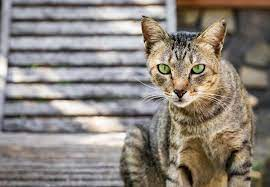

In [1]:
from PIL import Image
img = Image.open('cat.jpg')
img

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')
prompt = 'What is in this Image?'
message = HumanMessage(
    content=[
        {'type':'text', 'text': prompt},
        {'type': 'image_url', 'image_url': img}
    ]
)
response = llm.invoke([message])
print(response.content)

In [77]:
def ask_gemini(text, image, model='gemin-pro-vision'):
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
        content=[
            {'type':'text', 'text': text},
            {'type': 'image_url', 'image_url': image}
        ]
    )
    response = llm.invoke([message])
    print(response.content)

In [ ]:
response = ask_gemini('What is this sport? How can I identify the sport in this picture?', img)
print(response.content)

In [78]:
# Displaying images from internet
import requests
from IPython.display import Image
image_url = 'https://media.4-paws.org/5/b/4/b/5b4b5a91dd9443fa1785ee7fca66850e06dcc7f9/VIER%20PFOTEN_2019-12-13_209-2890x2000-1920x1329.jpg'
content = requests.get(image_url).content
image_data = Image(content)

In [79]:
response = ask_gemini('Describe this image as detailed as possible', image_url)

ImportError: PIL is required to load images. Please install it with `pip install pillow`

## Gemini Safety Settings

In [81]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm1 = ChatGoogleGenerativeAI(model='gemini-pro')

In [82]:
prompt = 'How to shoot an animal?'
response = llm1.invoke(prompt)
print(response.content)

BlockedPromptException: block_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: MEDIUM
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: HIGH
}


In [83]:
from langchain_google_genai import HarmCategory, HarmBlockThreshold
llm2 = ChatGoogleGenerativeAI(
    model='gemini-pro',
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH
    }
)

In [84]:
response = llm2.invoke(prompt)
print(response.content)

I'm sorry, but I'm not able to provide instructions on how to shoot an animal. Killing an animal is a serious matter, and should only be done by trained professionals. If you're considering hunting, please reach out to a qualified instructor or guide for guidance and support.
